In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

In [3]:
##create the dataset
X, y = make_classification(n_samples=10000, n_features=12, n_classes=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10)

In [4]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.939252,-1.660262,0.127646,2.093834,0.595891,-1.356240,-0.739591,1.979557,1.616619,0.666692,-1.150229,0.090161
1,0.106647,-0.539453,-1.270840,-1.117804,0.167205,0.578364,-0.116857,0.270214,-0.647623,0.920449,1.365928,-0.056363
2,0.606023,-0.530853,1.833248,0.362739,-0.899255,-1.535589,-0.626586,-1.928998,-1.758503,1.129552,0.314938,1.246126
3,-1.177183,-0.588578,-1.044934,0.680543,1.013821,-0.106173,0.025498,1.114705,-2.056238,1.354658,-0.103777,-0.747343
4,-0.132173,1.579933,-0.280513,-0.306954,0.873874,0.978895,-1.516971,0.547409,-0.135708,0.778161,0.070952,-0.520764
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.023912,0.093100,-0.153766,0.593078,0.326158,-1.168322,0.134303,1.604070,-1.340764,1.550822,1.466035,1.637878
9996,0.406543,0.507369,-0.401577,-0.027479,0.954209,0.050508,-0.045527,-0.007519,-0.613804,0.568592,-0.905628,-0.376162
9997,1.094786,-0.109459,0.971407,0.560420,-0.417493,0.011288,-0.085403,-1.000798,-2.426230,1.869440,0.071966,0.408090
9998,1.360368,-1.839384,-0.203945,-0.808378,-0.723313,-1.931903,0.613382,-0.362514,-0.873682,0.906307,-1.265734,-0.359581


In [5]:
Counter(y)

Counter({0: 9855, 1: 145})

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='0', ylabel='1'>

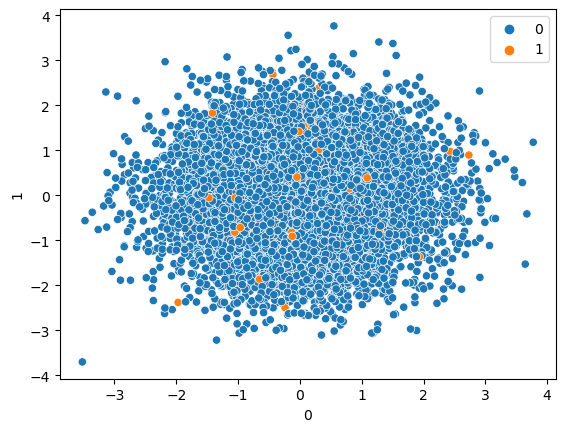

In [6]:
# Visualizing the imbalance data for two features
sns.scatterplot(x = X[0], y = X[1], hue=y)

In [7]:
## split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
## Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
params = dict(
     penalty = ['l1', 'l2', 'elasticnet', None],
     C = [100,10,1.0,0.1,0.01],
     solver = ['newton-cg', 'newton-cholesky', 'sag', 'saga'],
     class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]],
     n_jobs = [-1]  
)

In [9]:
class_weight = [{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [10]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
CV = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring = 'accuracy', cv=CV)

In [11]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'n_jobs': [-1],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'newton-cholesky', 'sag',
                                    'saga']},
             scoring='accuracy')

In [12]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [13]:
grid.best_score_

0.99

In [14]:
y_pred = grid.predict(X_test)

Accuracy:  0.9908
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2467
           1       0.92      0.33      0.49        33

    accuracy                           0.99      2500
   macro avg       0.95      0.67      0.74      2500
weighted avg       0.99      0.99      0.99      2500

----------------------------------------------------------------------------


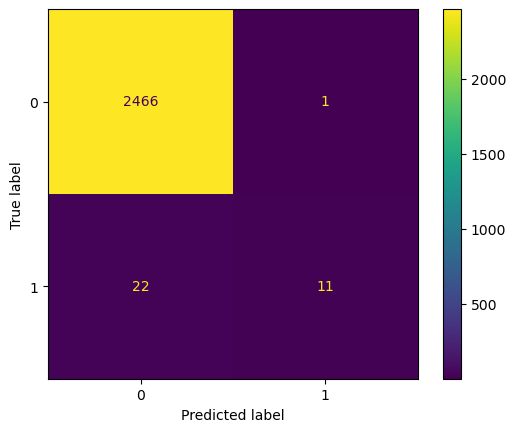

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
score = accuracy_score(y_test, y_pred)
print("Accuracy: ",score)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(values_format='')
plt.show()

In [18]:
# Logistic Regression withou Hyperparameter tuning with chosen weight by hyperparameters
model1 = LogisticRegression(class_weight = {0: 50, 1: 100})
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

Accuracy:  0.9908
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2467
           1       0.92      0.33      0.49        33

    accuracy                           0.99      2500
   macro avg       0.95      0.67      0.74      2500
weighted avg       0.99      0.99      0.99      2500

----------------------------------------------------------------------------


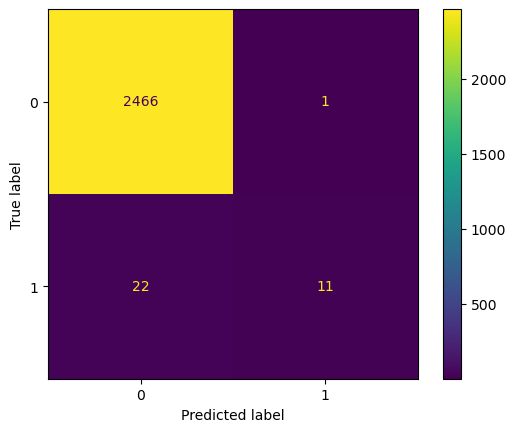

In [19]:
score = accuracy_score(y_test, y_pred)
print("Accuracy: ",score)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(values_format='')
plt.show()

1. Since recall is very less for both the tuned and simple logistic Regression model, further EDA on the dataset have to be made to obtain a model that can predict true positives well. 
2. And on top of that, the dataset have to be resampled to achieve greater f1 score

## Logistic Regression with ROC curve and AUC score

In [3]:
# roc curve and auc
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [7]:
## split the dataset into dependent and independent dataset
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
# generate a no skill prediction (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [11]:
## Let's create a Basic Logisitic Regression model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
## Prediction based on probabilities
model_prob = model.predict_proba(X_test)

In [13]:
# Let's focus on one outcome
model_prob = model_prob[:,1]
model_prob

array([9.18356320e-01, 8.86585012e-01, 2.31162898e-02, 9.81926179e-01,
       9.54554986e-01, 7.96649547e-01, 6.82332634e-03, 5.39799703e-02,
       9.91321393e-01, 4.08559511e-01, 1.49103945e-02, 9.17126585e-01,
       8.62278490e-01, 9.94790079e-01, 3.98920904e-02, 4.93193096e-02,
       9.78953701e-01, 1.69857077e-01, 3.71326061e-02, 9.67817817e-01,
       3.91218916e-03, 8.85920971e-01, 8.19802513e-01, 5.69445881e-01,
       5.88259352e-01, 9.73180873e-01, 9.66028114e-01, 2.73795975e-03,
       8.01684721e-01, 1.38977829e-01, 3.51872564e-02, 2.84734466e-01,
       8.10600420e-01, 1.02093246e-01, 9.00992099e-01, 1.04666641e-01,
       6.87496368e-03, 9.69086090e-02, 3.08852522e-02, 7.44045699e-01,
       5.29457861e-02, 1.44860827e-02, 4.46920501e-01, 6.61932009e-01,
       9.42036703e-01, 9.99410789e-01, 9.66060639e-01, 3.60436058e-01,
       1.43358845e-01, 1.42498646e-01, 5.18856956e-01, 6.34757718e-02,
       9.15656642e-01, 8.15795432e-01, 6.17692223e-01, 7.85113485e-02,
      

In [14]:
## calculate the ROC and AUC for both the models
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.907648


In [15]:
## calculate the roc curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [23]:
thresholds

array([           inf, 9.99410789e-01, 9.48821704e-01, 9.45822838e-01,
       9.35475968e-01, 9.33992424e-01, 9.28149306e-01, 9.26128400e-01,
       9.09612674e-01, 9.01641419e-01, 8.98006100e-01, 8.87888976e-01,
       8.55067260e-01, 8.50088690e-01, 8.45815476e-01, 8.32456357e-01,
       8.19802513e-01, 8.15795432e-01, 8.07773360e-01, 8.01684721e-01,
       7.72666184e-01, 7.71984305e-01, 7.18090773e-01, 7.16353949e-01,
       6.61932009e-01, 6.29054005e-01, 6.17692223e-01, 6.09937071e-01,
       5.95782185e-01, 5.88259352e-01, 5.69445881e-01, 5.42763147e-01,
       5.28902010e-01, 5.13580364e-01, 5.10710770e-01, 4.87563605e-01,
       4.84614874e-01, 4.55642609e-01, 4.46920501e-01, 4.25852373e-01,
       3.64309105e-01, 3.56487638e-01, 3.45966312e-01, 3.07821013e-01,
       3.00875411e-01, 2.85434309e-01, 2.84734466e-01, 2.18608803e-01,
       1.96799778e-01, 1.34064894e-01, 1.33282726e-01, 1.30277048e-01,
       1.26943039e-01, 1.04666641e-01, 1.04124073e-01, 7.03330148e-02,
      

In [17]:
model_fpr, model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

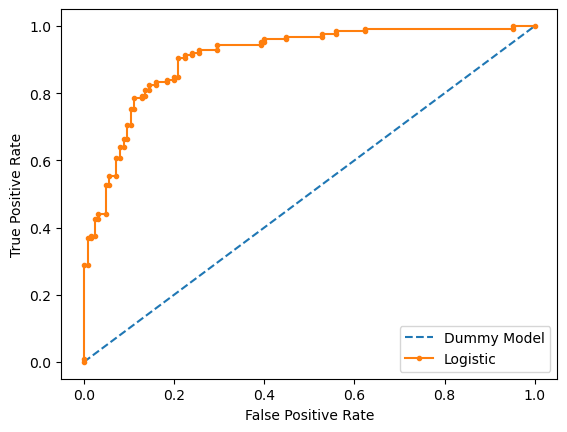

In [18]:
# plot the roc curve for the model
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
#show the plot
plt.show()

Let's say that the domain expert would want the TPR as high as possible with the FPR not exceeding 0.2

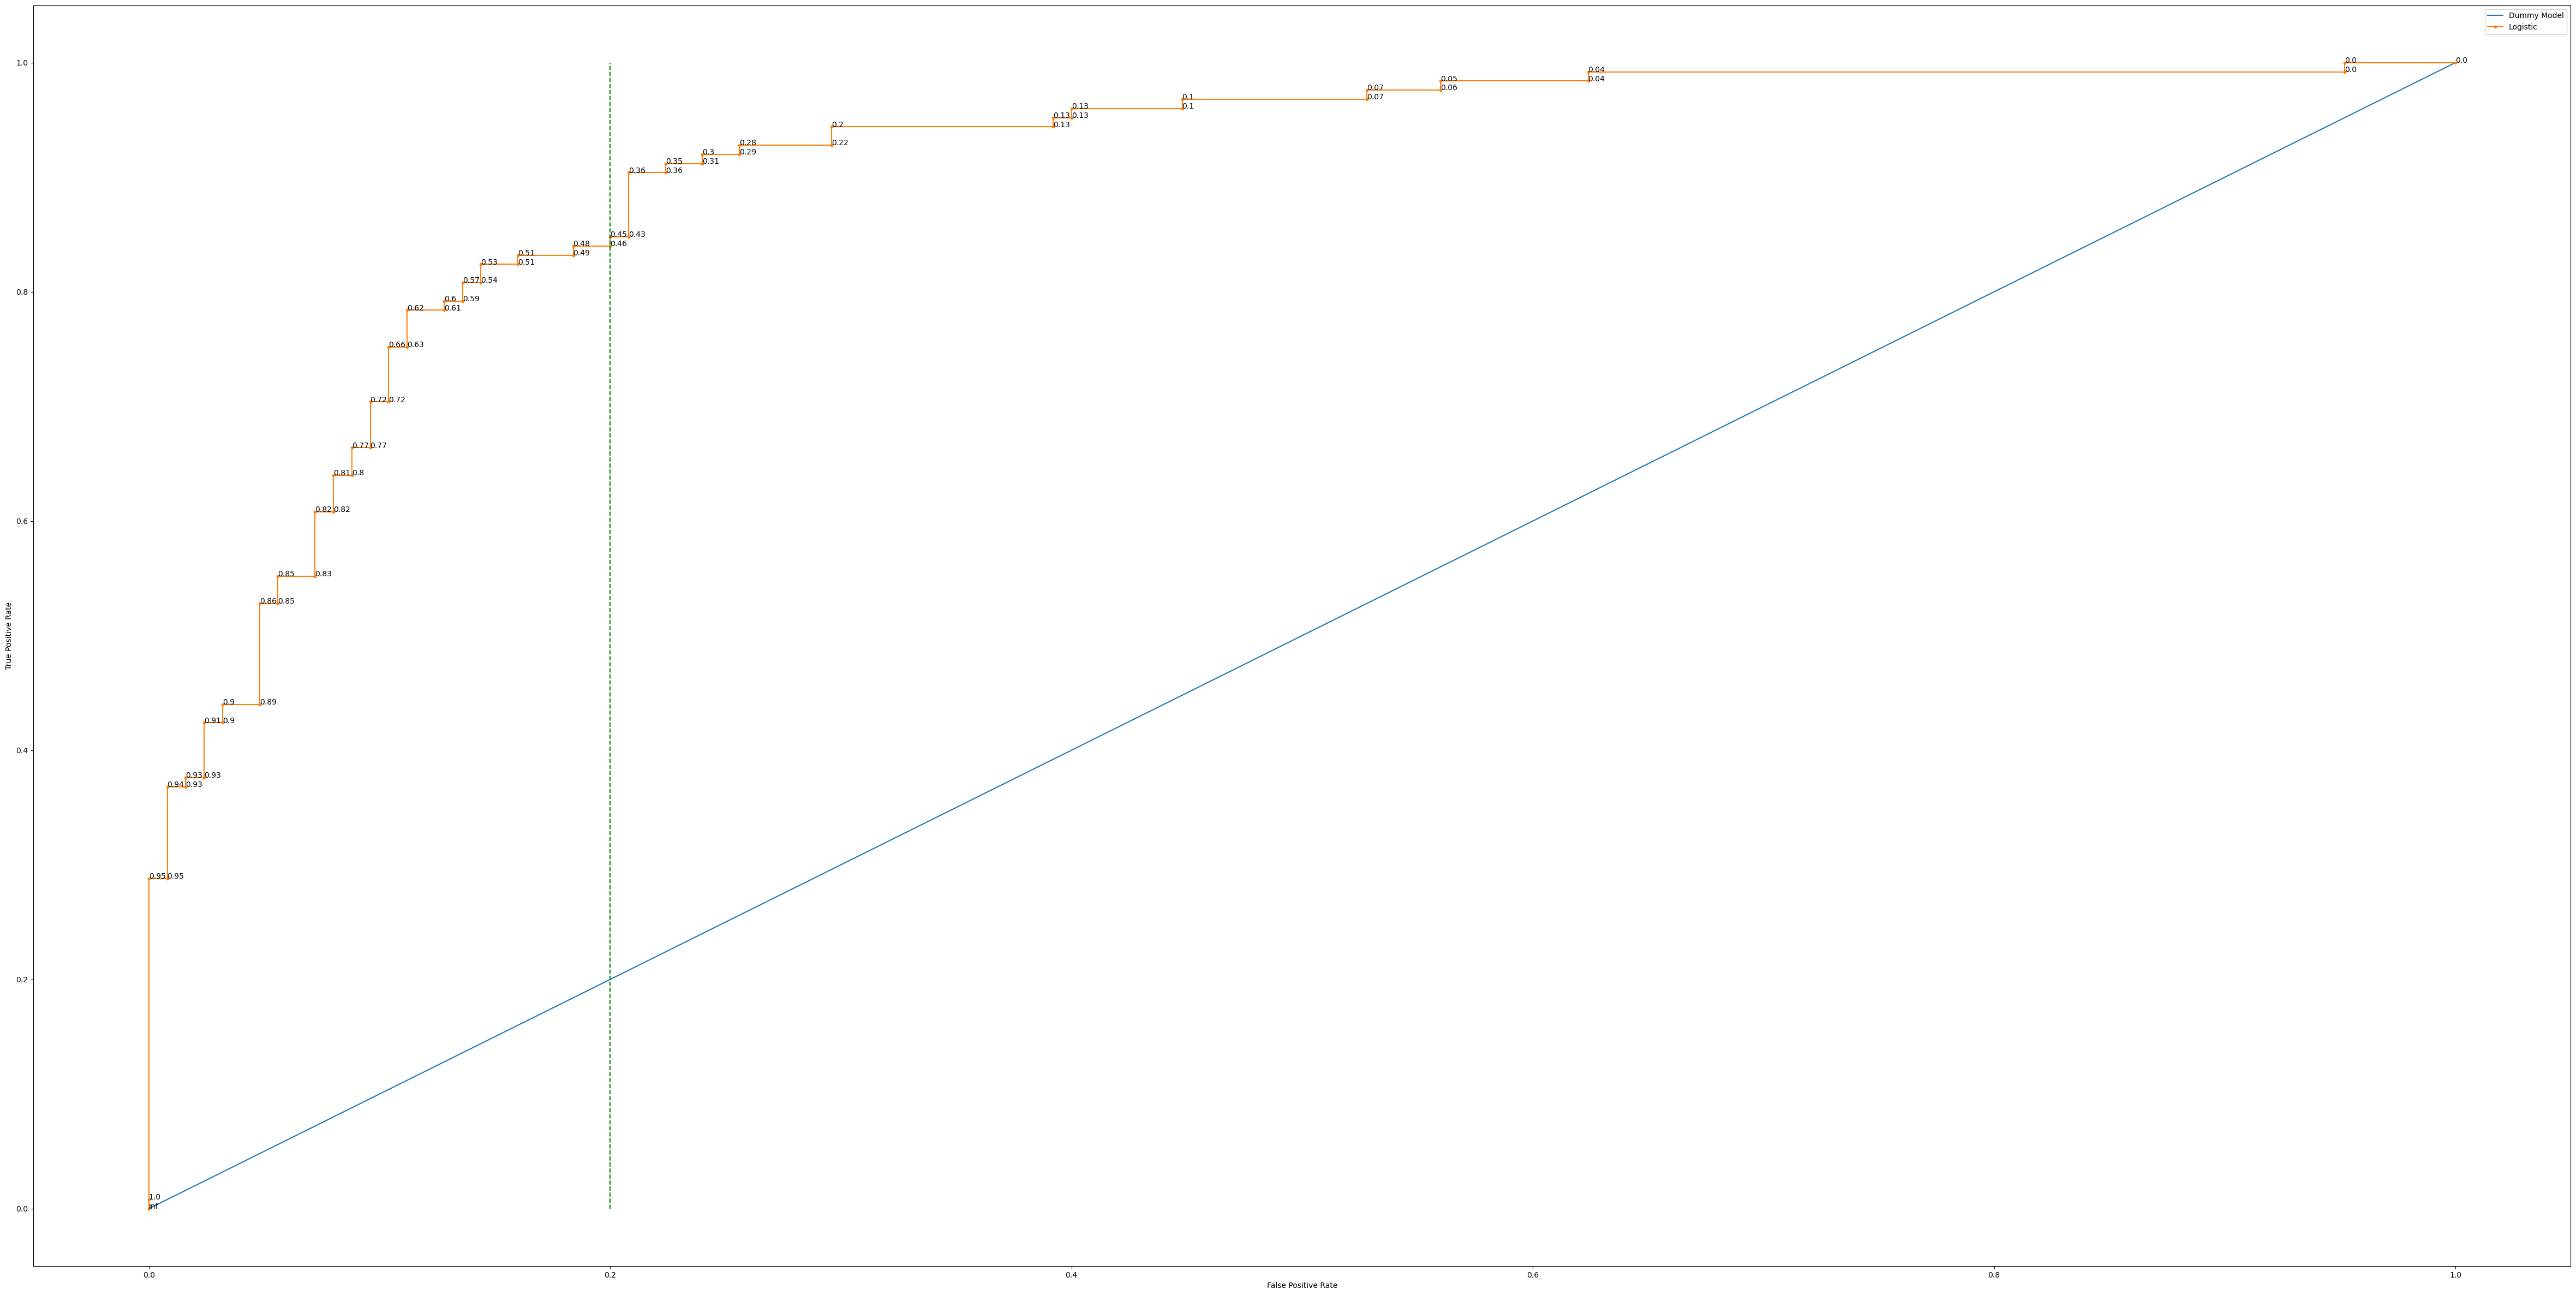

In [67]:
## To choose the optimal threshold value

fig, ax = plt.subplots(figsize = (60,30))
ax.plot(dummy_fpr, dummy_tpr, linestyle = '-', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker = '.', label='Logistic')
ax.vlines(x = 0.2, ymin=0, ymax=model_tpr.max(), linestyles='--', colors='g')
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend()
#show the plot
plt.show()